In [1]:
import pandas as pd

In [2]:
#import datasets
df_test = pd.read_csv("Corona_NLP_test.csv")
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [3]:
df_train = pd.read_csv("Corona_NLP_train.csv")
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
#check dataset summary
print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage:

In [5]:
#merge both datasets for analysis
df = df_train.append(df_test)
df.reset_index()
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [7]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
#fill NaN in the location column with unknown
df["Location"]= df["Location"].fillna("Unknown")
df_test["Location"]= df_test["Location"].fillna("Unknown")
df_train["Location"]= df_train["Location"].fillna("Unknown")

In [9]:
import matplotlib.pyplot as plt

In [10]:
#sentiment analysis
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [11]:
sent_counts = df["Sentiment"].value_counts()
sent_counts

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

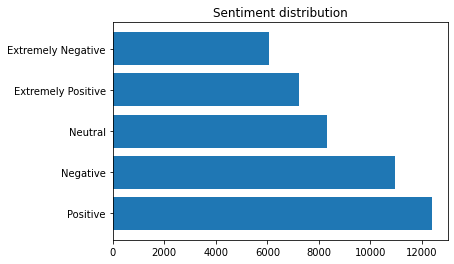

In [12]:
#plot
plt.barh(sent_counts.index, sent_counts)
plt.title("Sentiment distribution")
plt.show()

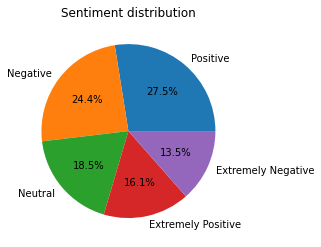

In [13]:
plt.pie(sent_counts, labels= sent_counts.index, autopct='%1.1f%%')
plt.title("Sentiment distribution")
plt.show()

In [14]:
df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Flemington, New Jersey',
       'Farmington, NM', 'Haverford, PA'], dtype=object)

In [15]:
df.Location.nunique()

13127

In [16]:
df_train.Location.value_counts()

Unknown                   8593
London                     540
United States              528
London, England            520
New York, NY               395
                          ... 
Bs paas me hi !!!            1
Manchester/England           1
Shillong, India              1
Everywhere and Nowhere       1
Gartocharn, Scotland         1
Name: Location, Length: 12220, dtype: int64

In [17]:
import seaborn as sns

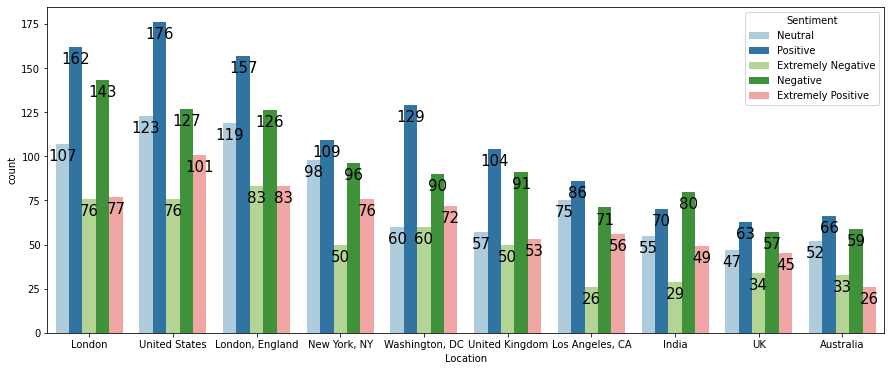

In [18]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = "Location", hue = "Sentiment", data = df, 
              order = df_train.Location.value_counts()[1:11].index, orient = "h", palette = "Paired") 

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

In [19]:
print(df.TweetAt.nunique())
print(df.TweetAt.unique())

44
['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '02-03-2020' '03-03-2020' '04-03-2020' '05-03-2020' '06-03-2020'
 '07-03-2020' '08-03-2020' '09-03-2020' '10-03-2020' '11-03-2020'
 '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020']


In [20]:
print(df.ScreenName.nunique())

44955


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(df_train['OriginalTweet'])
test_vec = vectorizer.transform(df_test["OriginalTweet"])

In [24]:
x_train = train_vec
x_test = test_vec

In [25]:
from sklearn import preprocessing
sentiment_encoder = preprocessing.LabelEncoder()

y_train = sentiment_encoder.fit_transform(df_train['Sentiment'])
y_test = sentiment_encoder.fit_transform(df_test['Sentiment'])

In [26]:
model = LogisticRegression(max_iter = 10000)

In [27]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [28]:
pred = model.predict(x_test)
print(pred[:10])

[3 4 4 2 3 3 4 2 0 4]


In [29]:
labels = df_test.Sentiment.unique()
labels[pred[:10]]

array(['Negative', 'Neutral', 'Neutral', 'Extremely Positive', 'Negative',
       'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative',
       'Neutral'], dtype=object)

In [30]:
confusion_matrix(pred, y_test)

array([[327,   5, 132,   6,  27],
       [  5, 370,  25,   6, 109],
       [222,  18, 588,  84, 132],
       [ 13,   7, 123, 449,  84],
       [ 25, 199, 173,  74, 595]])

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60       497
           1       0.62      0.72      0.66       515
           2       0.56      0.56      0.56      1044
           3       0.73      0.66      0.69       676
           4       0.63      0.56      0.59      1066

    accuracy                           0.61      3798
   macro avg       0.62      0.63      0.62      3798
weighted avg       0.62      0.61      0.61      3798

